In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [38]:
path = '../../CrawlData/all_data/final_data_movie.csv'
data = pd.read_csv(path)
data = data[['Title','Genre','review_film']]

In [39]:
#! drop all null column in Genre
data=data.dropna().reset_index(drop=True)

In [40]:
#! genre only get 1 type:
for i in range(len(data['Genre'])):
        #print(g)
        if "," in data['Genre'][i]:
            g = data['Genre'][i].split(", ")[1]
            #g = g.split(", ")[1]
            data.loc[i,'Genre'] = g
        else:
            continue

In [41]:
data.head(3)

,Title,Genre,review_film
0,Frieren: Beyond Journey's End,Drama,During their decade-long quest to defeat the D...
1,Fullmetal Alchemist: Brotherhood,Adventure,After a horrific alchemy experiment goes wrong...
2,Steins;Gate,Sci-Fi,Eccentric scientist Rintarou Okabe has a never...


In [42]:
print(data.isnull().sum())

Title          0
Genre          0
review_film    0
dtype: int64


In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(data,data['Genre'],random_state=42,test_size=0.2)

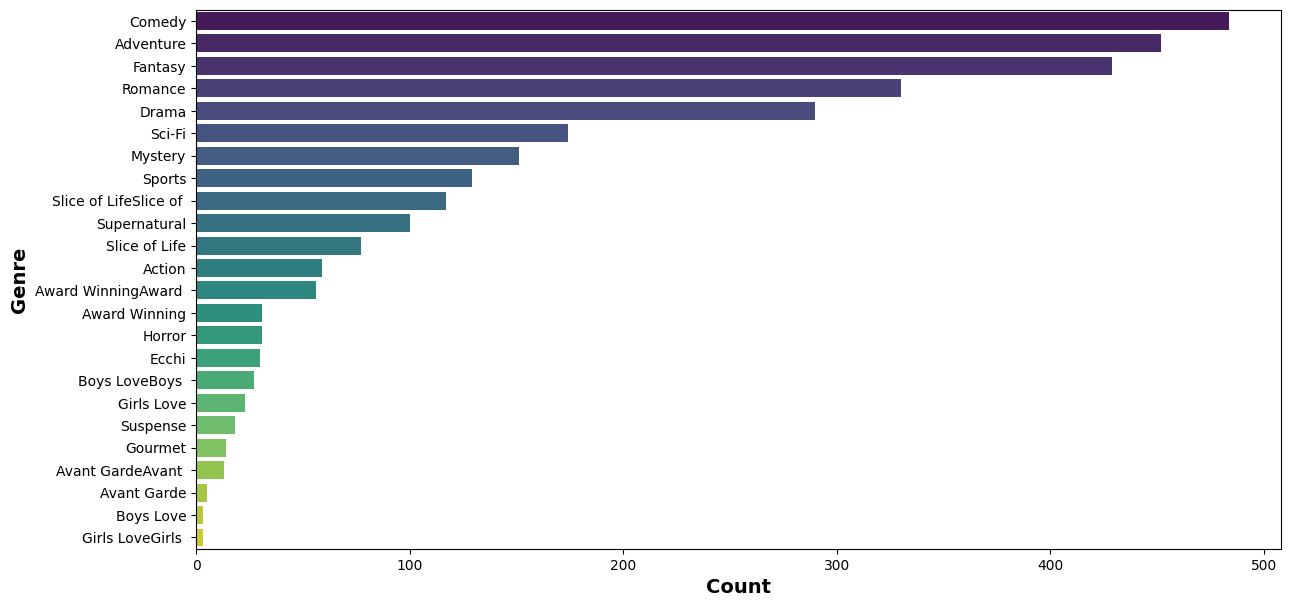

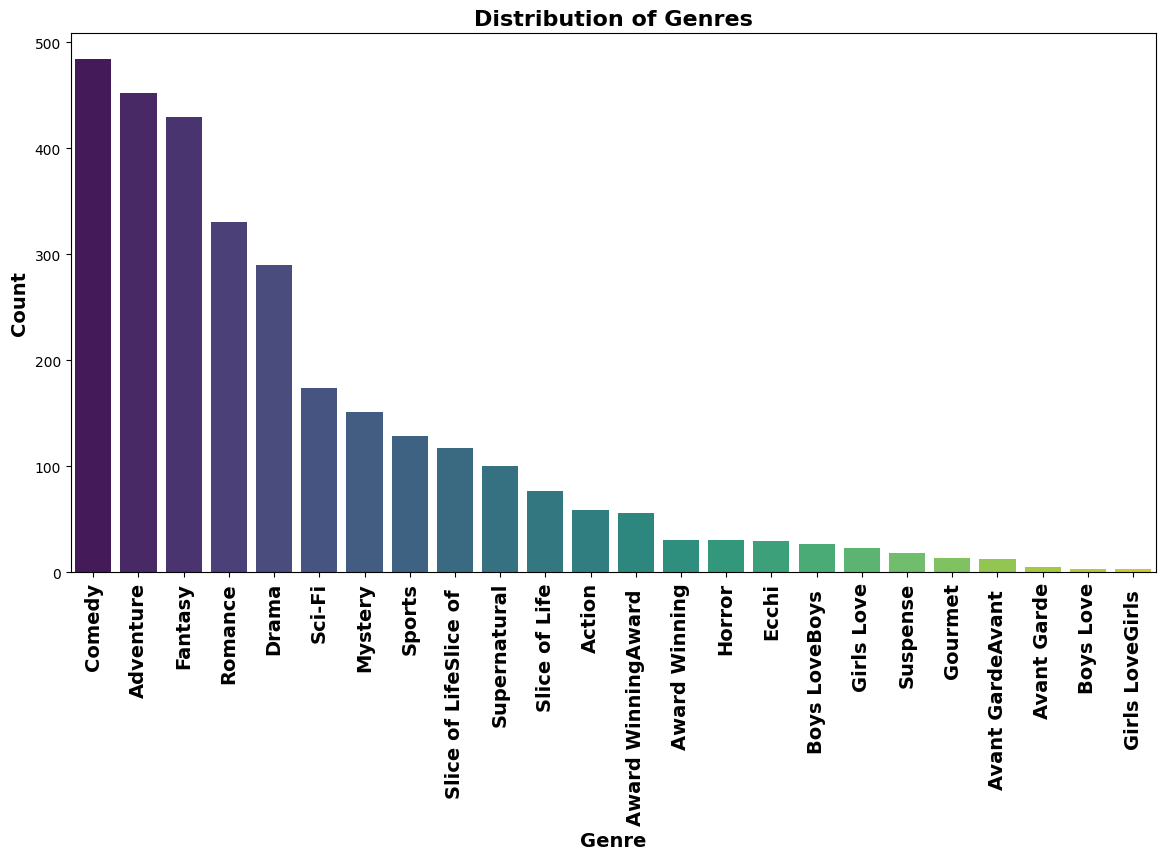

In [44]:
# Plot the distribution of genres in the training data
plt.figure(figsize=(14, 7))
sns.countplot(data=X_train, y='Genre', order=X_train['Genre'].value_counts().index, palette='viridis')
plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('Genre', fontsize=14, fontweight='bold')

# Plot the distribution of genres using a bar plot
plt.figure(figsize=(14, 7))
counts = X_train['Genre'].value_counts()
sns.barplot(x=counts.index, y=counts, palette='viridis')
plt.xlabel('Genre', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Genres', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.show()

In [45]:
#! Cải thiện clean text!

In [46]:
# Initialize the stemmer and stop words
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

# Define the clean_text function
def clean_text(text):
    text = text.lower()  # Lowercase all characters
    text = re.sub(r'@\S+', '', text)  # Remove Twitter handles
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)  # Keep only characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')  # Keep words with length > 1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')  # Remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()  # Remove repeated/leading/trailing spaces
    return text

# Apply the clean_text function to the 'Description' column in the training and test data
X_train['Text_cleaning'] = X_train['review_film'].apply(clean_text)
X_test['Text_cleaning'] = X_test['review_film'].apply(clean_text)

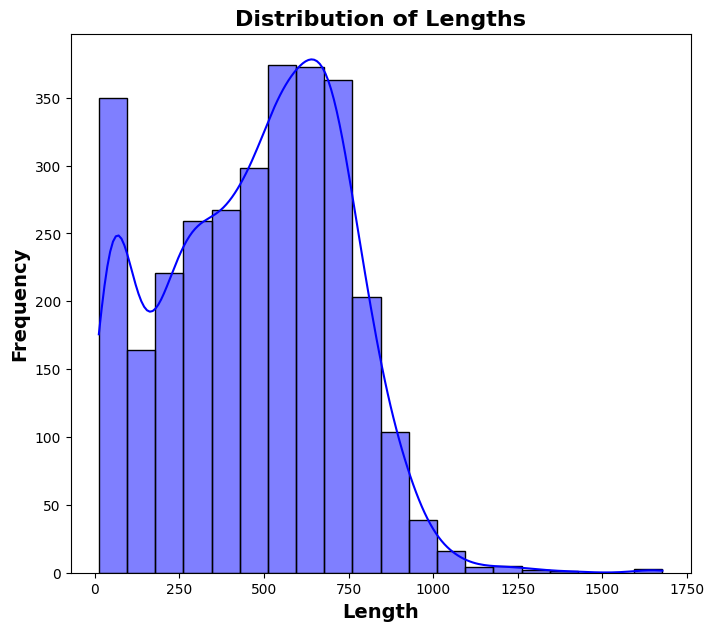

In [47]:

# Calculate the length of cleaned text
X_train['length_Text_cleaning'] = X_train['Text_cleaning'].apply(len)
# Visualize the distribution of text lengths
plt.figure(figsize=(8, 7))
sns.histplot(data=X_train, x='length_Text_cleaning', bins=20, kde=True, color='blue')
plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')
plt.show()

In [48]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_idf = tfidf_vectorizer.fit_transform(X_train['Text_cleaning'])

# Transform the test data
X_test_idf = tfidf_vectorizer.transform(X_test['Text_cleaning'])

In [49]:
# Split the data into training and validation sets

#! Link to baseline: https://www.kaggle.com/code/imgowthamg/movie-genre-classification
X = X_train_idf
y = Y_train
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = classifier.predict(X_val)

# Evaluate the performance of the model
accuracy = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.14754098360655737
                        precision    recall  f1-score   support

                Action       0.00      0.00      0.00         8
             Adventure       0.14      0.12      0.13        94
           Avant Garde       0.00      0.00      0.00         1
     Avant GardeAvant        0.00      0.00      0.00         2
         Award Winning       0.00      0.00      0.00         1
   Award WinningAward        0.00      0.00      0.00        10
        Boys LoveBoys        0.00      0.00      0.00         6
                Comedy       0.14      0.85      0.24        85
                 Drama       0.00      0.00      0.00        62
                 Ecchi       0.00      0.00      0.00         6
               Fantasy       0.32      0.07      0.12        98
            Girls Love       0.00      0.00      0.00         8
               Gourmet       0.00      0.00      0.00         1
                Horror       0.00      0.00      0.00         

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
